In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
heart_disease_data = pd.read_csv('heart.csv')
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

From the result above we can note that we have:

    165 patients with heart disease
    138 patients without heart disaese


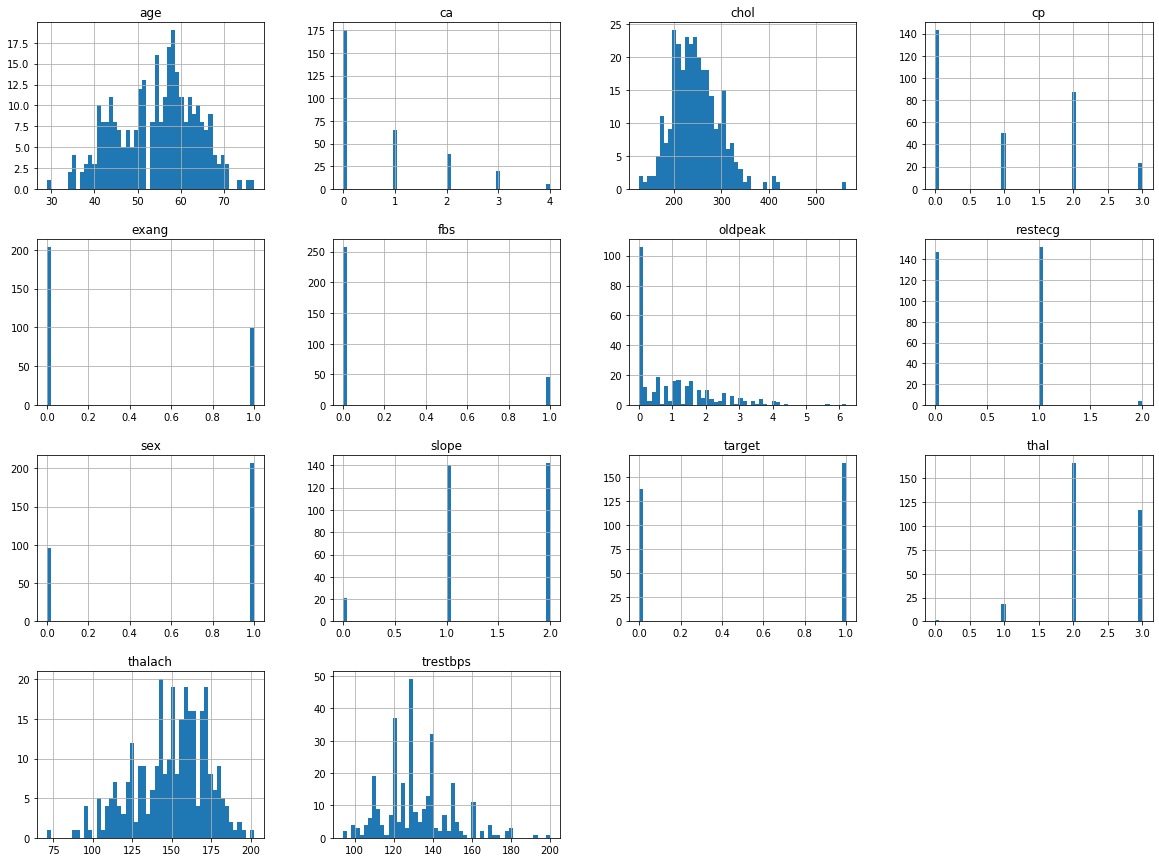

In [5]:
%matplotlib inline
heart_disease_data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#Looking for possible correlation patterns in the datasets
corr_matrix = heart_disease_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [7]:
heart_disease_data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

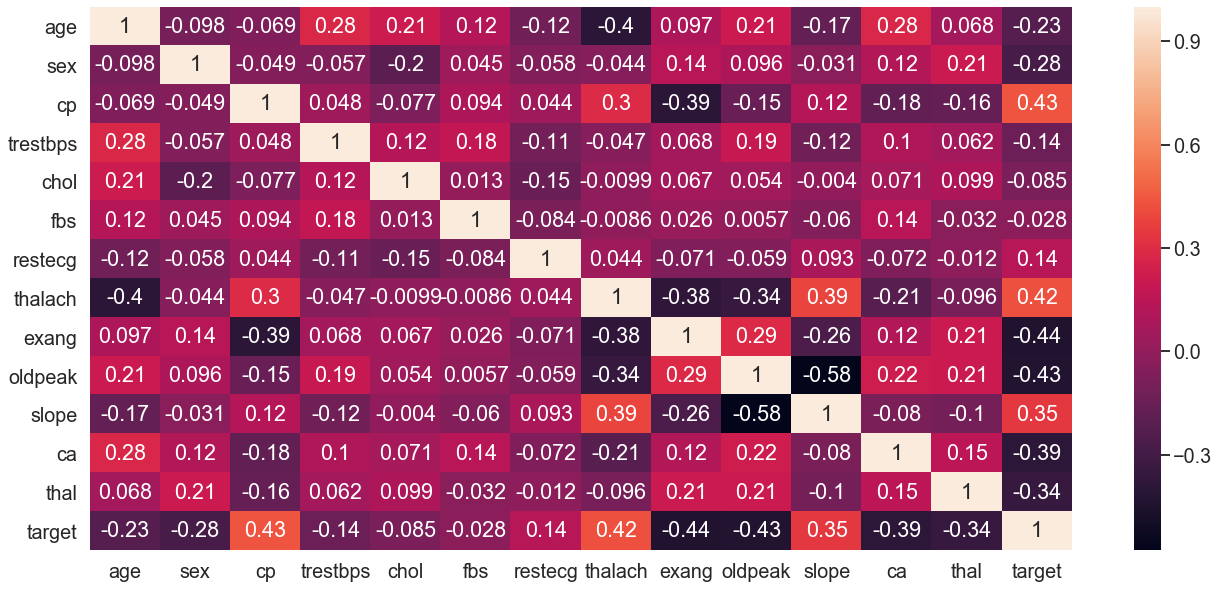

In [8]:


sns.set(rc={'figure.figsize':(22,10)})
sns.set_context("talk", font_scale=1.2)
sns.heatmap(
    heart_disease_data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(),
    annot=True
)



Text(0, 0.5, 'Frequency')

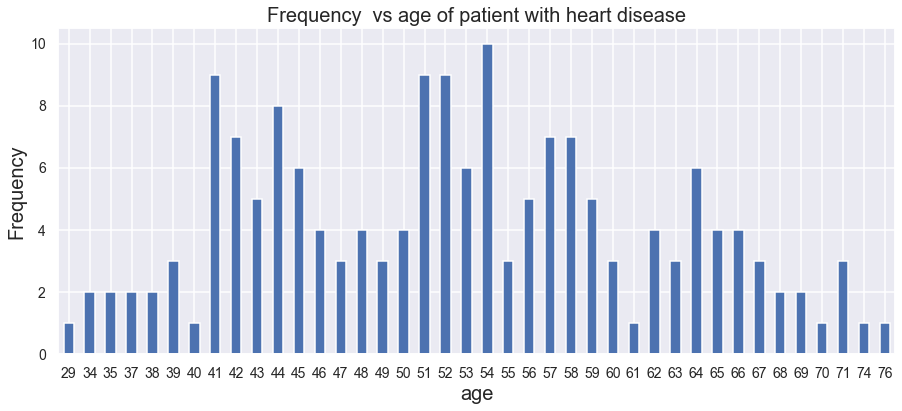

In [9]:
#Plot the frequency of patients with heart disease
ax = heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequency  vs age of patient with heart disease",
    rot=0)
ax.set_title("Frequency  vs age of patient with heart disease", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

# ENCODING CATEGORICAL DATA

In [10]:


#divide the data to target and features
X = heart_disease_data.drop(['target'], axis=1)
y = heart_disease_data.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(heart_disease_data, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()



,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [11]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [12]:
##Scaling Data
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Machine Learning Models

Logistic Regression Model

In [13]:
#Cretae Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train )

C:\Users\Electro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Predict  the test data 
y_pred_log_Reg = log_Reg.predict(X_test)

In [15]:


#  Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm



array([[30,  0],
       [ 0, 31]], dtype=int64)

K-NN Model


In [16]:
#Cretae KNN model and train the model
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#Predict  the test data 
y_pred_kNN = kNN.predict(X_test)

In [18]:
# Making the Confusion Matrix
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[26,  4],
       [ 3, 28]], dtype=int64)

In [19]:
#Calculate the accuracy of KNN model
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

0.8852459016393442

SVC - Support Vector classifier

In [20]:


#Cretae SVM model and train the model
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train )



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
#Predict  the test data 
y_pred_svc = svc.predict(X_test)

In [22]:


# Making the Confusion Matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_cm



array([[30,  0],
       [ 0, 31]], dtype=int64)

Decision Tree Classification

In [23]:
#Cretae Decision Tree Classification model and train the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
#Predict  the test data 
y_pred_dtc = dtc.predict(X_test)

In [25]:
# Making the Confusion Matrix
dtc_cm = confusion_matrix(y_test, y_pred_dtc)
dtc_cm

array([[30,  0],
       [ 0, 31]], dtype=int64)


Random Forest Classification

In [28]:
#Cretae Random Forest Classification model and train the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
#Predict  the test data 
y_pred_rfc = rfc.predict(X_test)

In [30]:
# Making the Confusion Matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[30,  0],
       [ 0, 31]], dtype=int64)

In [32]:
#Calculate the accuracy of Random Forest Classification model
rfc_acc = accuracy_score(y_test, y_pred_dtc) 
rfc_acc

1.0